In [99]:
import  torch
import matplotlib.pyplot as plt
import numpy as np
import  random

In [100]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = torch.mm(features,torch.Tensor(true_w).resize(2,1))+true_b
# labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)
# labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)


/var/folders/3p/r2r06j5n1j39gs1s7_k66qw40000gn/T/ipykernel_2130/1543133210.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


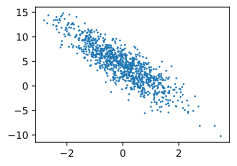

In [101]:
from IPython import display
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display() # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize() # 加分号只显示图
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

In [102]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples)) # 样本的读取顺序是随机的
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        # 最后一次可能不足一个batch
        j = torch.LongTensor(indices[i: min(i+batch_size, num_examples)]) # index_select函数根据索引返回对应元素
        yield features.index_select(0, j), labels.index_select(0, j)

def linreg(X,w,b):
    return torch.mm(X,w)+b
def loss_func(y_hat,y):
    return (y_hat-y.view(y_hat.size())) **2 /2
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size


In [103]:
w = torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float32)
b = torch.zeros(1,dtype=torch.float32)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)


tensor([0.], requires_grad=True)

In [105]:
lr = 0.03
num_epochs = 3
batch_size =10
net = linreg
loss = loss_func

# 训练模型一共需要num_epochs个迭代周期
for epoch in range(num_epochs):

# 在每一个迭代周期中，会使用训练集中所有样本一次（假设样本数能够被批量大小整除）。 # X和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):

# l是有关小批量X和y的损失
        l = loss( net(X, w, b), y).sum()
        # 小批量损失对模型参数求梯度
        l.backward() # 使用小批量随机梯度下降迭代模型参数
        sgd([w, b], lr, batch_size)
        # 梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
        train_l = loss(net(features, w, b), labels)
        print('epoch %d, loss %f' % (epoch+1, train_l.mean().item()))
print(w,b)

epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, loss 0.000052
epoch 1, lo